## importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### loading the csv file

In [2]:
dat=pd.read_csv(r'C:\Users\HP 440 G3\Downloads\diabetes.csv')

In [3]:
dat.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Data cleaning

In [4]:
dat.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
dat.duplicated().sum()

0

In [6]:
dat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Seperating the independent data variables and dependent variables 

In [7]:
x=dat.drop(columns='Outcome')

In [8]:
y=dat['Outcome']

### Splitting the data for training and testing purposes

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [11]:
x_train.shape

(537, 8)

In [12]:
y_train.shape

(537,)

In [13]:
x_test.shape

(231, 8)

In [14]:
y_test.shape

(231,)

## importing logistic regression algo for training the model

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
obj=LogisticRegression()

In [17]:
obj.fit(x_train,y_train)

C:\Users\HP 440 G3\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Checking the accuracy

In [18]:
training_score=obj.score(x_train,y_train)
testing_score=obj.score(x_test,y_test)


In [19]:
print(training_score*100)
print(testing_score*100)

78.02607076350093
75.75757575757575


### Prediction

In [20]:
predictions=obj.predict(x_test)

In [21]:
comparision =pd.DataFrame(y_test)

In [22]:
comparision # actual outcomes 

,Outcome
140,0
337,1
645,0
464,0
569,1
...,...
94,0
16,1
372,0
680,0


### comparing the predicted values with actual values

In [23]:
comparision['predicted_values']=predictions

In [24]:
comparision

,Outcome,predicted_values
140,0,0
337,1,0
645,0,0
464,0,1
569,1,0
...,...,...
94,0,0
16,1,0
372,0,0
680,0,0


In [25]:
y_test.head(10)

140    0
337    1
645    0
464    0
569    1
457    0
357    1
533    0
591    0
755    1
Name: Outcome, dtype: int64

### evaluating the model's training

In [26]:
from sklearn.metrics import confusion_matrix , classification_report

In [27]:
matrix=confusion_matrix(comparision['Outcome'],comparision['predicted_values'])

In [28]:
matrix

array([[131,  23],
       [ 33,  44]], dtype=int64)

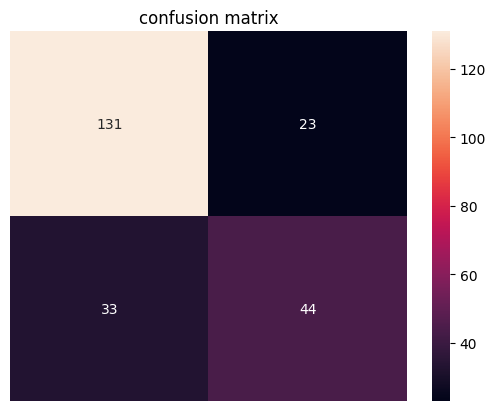

In [29]:

sns.heatmap(matrix,annot=True,fmt='d')  #fmt=which format we want and d specifies decimal
plt.title('confusion matrix')
plt.axis('off')
plt.show()

In [30]:
report=classification_report(comparision['Outcome'],comparision['predicted_values'])

In [31]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       154
           1       0.66      0.57      0.61        77

    accuracy                           0.76       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



## saving the logistic regression model


In [54]:
import os,joblib
os.makedirs('models',exist_ok=True)
joblib.dump(obj,'./models/logisticRegression.lb')

['./models/logisticRegression.lb']

## Training the model with Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [34]:
tree_obj=DecisionTreeClassifier() # object creation

In [35]:
tree_obj.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
tree_training_score=tree_obj.score(x_train, y_train)
tree_test_score=tree_obj.score(x_test, y_test)

In [37]:
print(training_score*100)
print(testing_score*100) # it is leading to very high overfitting to solve this we gonna do hyperparameter tuning

78.02607076350093
75.75757575757575


## Hyperparameter Tuning

In [38]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [39]:
parameters={'max_depth':[50,100,70],'min_samples_split':[80,100.150]}
grid_obj=GridSearchCV(estimator=tree_obj,param_grid=parameters,cv=5)

In [40]:
grid_obj.fit(x_train,y_train)

C:\Users\HP 440 G3\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP 440 G3\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP 440 G3\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP 440 G3\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_pa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [50, 100, 70],
                         'min_samples_split': [80, 100.15]})

In [41]:
grid_obj.best_params_

{'max_depth': 50, 'min_samples_split': 80}

In [42]:
Gridtraining_score=grid_obj.score(x_train,y_train)
Gridtesting_score=grid_obj.score(x_test,y_test)


In [43]:
print(Gridtraining_score) 
print(Gridtesting_score)

0.7970204841713222
0.7792207792207793


In [44]:
prediction2=grid_obj.predict(x_test)


In [45]:
comparision['treePredicted_values']= prediction2

In [46]:
comparision

,Outcome,predicted_values,treePredicted_values
140,0,0,0
337,1,0,0
645,0,0,1
464,0,1,0
569,1,0,0
...,...,...,...
94,0,0,0
16,1,0,1
372,0,0,0
680,0,0,0


In [47]:
tree_matrix=confusion_matrix(comparision['Outcome'],comparision['treePredicted_values'])

In [48]:
tree_matrix

array([[132,  22],
       [ 29,  48]], dtype=int64)

In [49]:
tree_report=classification_report(comparision['Outcome'],comparision['treePredicted_values'])

In [50]:
print(tree_report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       154
           1       0.69      0.62      0.65        77

    accuracy                           0.78       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



## Saving Decision tree model

In [55]:
import os,joblib
os.makedirs('models',exist_ok=True)
joblib.dump(tree_obj,'./models/decision_tree_obj.lb')



['./models/decisiontree_gridsearch_obj.lb']

## Training our data with Random Forest algo

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
forest_obj=RandomForestClassifier() #obj creation

In [59]:
forest_obj.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
print('training score:',forest_obj.score(x_train,y_train)*100)
print('testing score:',forest_obj.score(x_test,y_test)*100)


training score: 100.0
testing score: 75.75757575757575


It is also overfitted so we will apply hyperparameter tuning

In [61]:
param = {
    'n_estimators': [50, 100],  # fewer trees
    'max_depth': [10,12,19],  # shallower trees
    'min_samples_split': [25, 20, 12],  # larger splits
    'min_samples_leaf': [30, 26, 18],  # larger leaf nodes
   
}
grid_obj2=GridSearchCV(estimator=forest_obj,param_grid=param,cv=10)

In [62]:
grid_obj2.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 12, 19],
                         'min_samples_leaf': [30, 26, 18],
                         'min_samples_split': [25, 20, 12],
                         'n_estimators': [50, 100]})

In [63]:
grid_obj2.best_params_

{'max_depth': 12,
 'min_samples_leaf': 18,
 'min_samples_split': 25,
 'n_estimators': 50}

In [64]:
print('train score:',grid_obj2.score(x_train,y_train))
print('test score:',grid_obj2.score(x_test,y_test))

train score: 0.8063314711359404
test score: 0.7619047619047619


In [65]:
prediction3=grid_obj2.predict(x_test)

In [66]:
comparision['forestPredicted_values']= prediction3

In [67]:
comparision.head(10)

,Outcome,predicted_values,treePredicted_values,forestPredicted_values
140,0,0,0,0
337,1,0,0,0
645,0,0,1,1
464,0,1,0,0
569,1,0,0,0
457,0,0,0,0
357,1,1,1,1
533,0,0,0,0
591,0,0,0,0
755,1,1,1,1


In [68]:
forest_matrix=confusion_matrix(comparision['Outcome'],comparision['forestPredicted_values'])

In [ ]:
forest_matrix

array([[128,  16],
       [ 47,  40]], dtype=int64)

In [69]:
forest_report=classification_report(comparision['Outcome'],comparision['forestPredicted_values'])

In [70]:
print(forest_report)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       154
           1       0.70      0.49      0.58        77

    accuracy                           0.76       231
   macro avg       0.74      0.69      0.71       231
weighted avg       0.75      0.76      0.75       231



## saving the random forest model

In [71]:
os.makedirs('models',exist_ok=True)
joblib.dump(forest_obj,'./models/randomforest_obj.lb')



['./models/randomforest_obj.lb']

## Comparing all the reports and metrices of diff. applied algorithms 

In [72]:
print(forest_matrix) # here true positve + true neg. values adds upto  178

[[138  16]
 [ 39  38]]


In [73]:
print(tree_matrix) # here true positve + true neg. values adds upto  180

[[132  22]
 [ 29  48]]


In [74]:
print(matrix) # here true positve + true neg. values adds upto 169

[[131  23]
 [ 33  44]]


In [75]:
print(forest_report)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       154
           1       0.70      0.49      0.58        77

    accuracy                           0.76       231
   macro avg       0.74      0.69      0.71       231
weighted avg       0.75      0.76      0.75       231



In [76]:
print(tree_report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       154
           1       0.69      0.62      0.65        77

    accuracy                           0.78       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [77]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       154
           1       0.66      0.57      0.61        77

    accuracy                           0.76       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



#### the best algo is decision tree to train our model and use for predictions